In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [138]:
df = pd.read_csv("C:\src\Project\Final_Project\marketing_campaign.csv",sep="\t")
df.shape

(2240, 29)

In [139]:
pd. set_option('display.max_columns', None)

In [140]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [142]:

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [143]:
df = df.dropna()

Dates are in Object format

In [144]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='mixed')
df["Dt_Customer"]

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

Finding Newest and Oldest Customer

In [145]:
new_customer = df["Dt_Customer"].max().date()
old_customer = df["Dt_Customer"].min().date()
print("New Customer:",new_customer)
print("Old Customer:",old_customer)


New Customer: 2014-12-06
Old Customer: 2012-01-08


In [146]:
days = []
for i in df["Dt_Customer"]:
    days.append(new_customer-i.date())
df["Customer_Dur"] = days
df["Customer_Dur"] = pd.to_numeric(df["Customer_Dur"], errors='coerce')
df["Customer_Dur"].dtype

dtype('int64')

In [147]:
Marital_Status=df["Marital_Status"].unique()
Education = df["Education"].unique()
print(Marital_Status)
print(Education)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [148]:
Marital_Status_count_dict = {}
Education_count_dict = {}
for i in Marital_Status:
    Marital_Status_count_dict[i] = df["Marital_Status"][df["Marital_Status"] == i].count()
for i in Education:
    Education_count_dict[i] = df["Education"][df["Education"]==i].count()
print(Marital_Status_count_dict)
print(Education_count_dict)

{'Single': 471, 'Together': 573, 'Married': 857, 'Divorced': 232, 'Widow': 76, 'Alone': 3, 'Absurd': 2, 'YOLO': 2}
{'Graduation': 1116, 'PhD': 481, 'Master': 365, 'Basic': 54, '2n Cycle': 200}


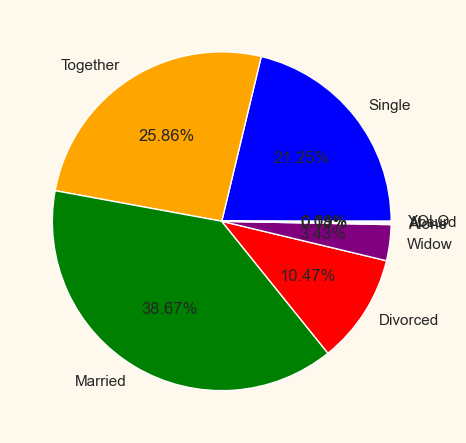

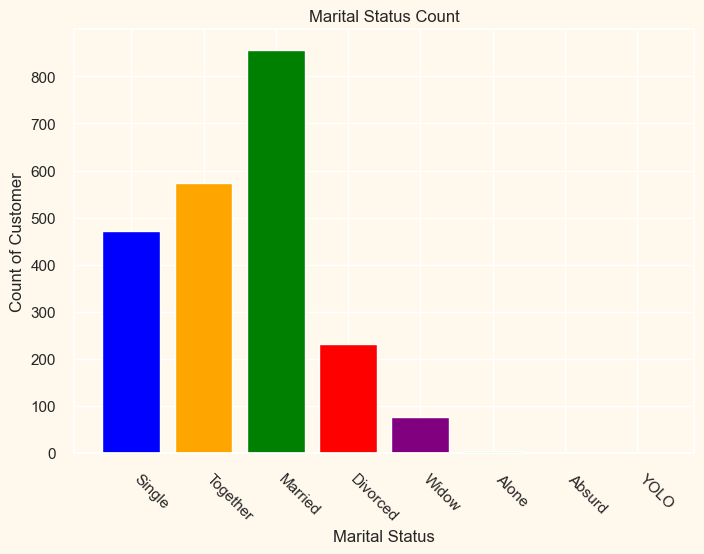

In [149]:
sizes_marital = Marital_Status_count_dict.values()
labels_marital = Marital_Status_count_dict.keys()
MyColors = ['blue','orange','green','red', 'purple', 'lime', 'cyan','magenta']
plt.pie(sizes_marital,labels=labels_marital,autopct="%1.2f%%",colors=MyColors)
plt.show()
plt.bar(labels_marital,sizes_marital,color=MyColors)
plt.xlabel("Marital Status")
plt.ylabel("Count of Customer")
plt.title("Marital Status Count")
plt.xticks(rotation=-45,ha="left")
# plt.grid(axis="y",linestyle="--")
plt.show()


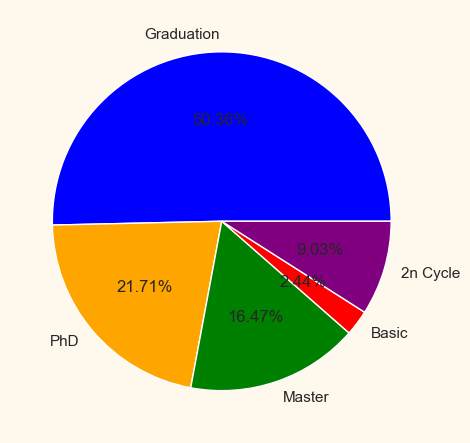

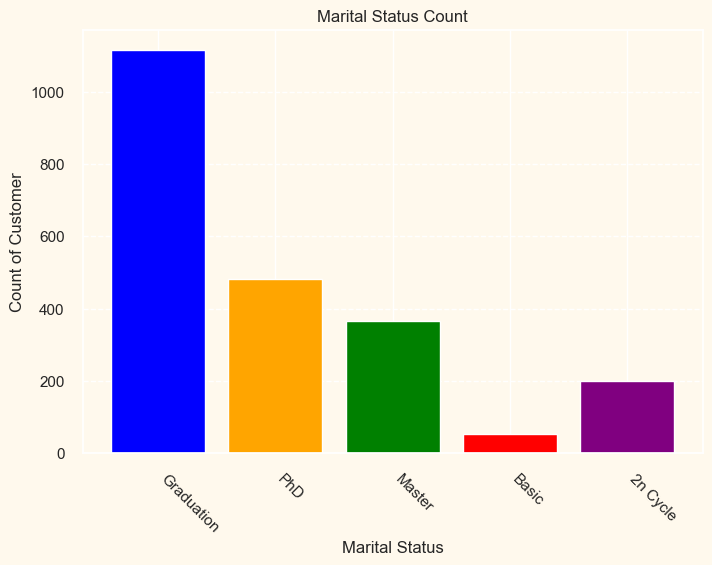

In [150]:
sizes_education = Education_count_dict.values()
labels_education = Education_count_dict.keys()
MyColors = ['blue','orange','green','red', 'purple', 'lime', 'cyan','magenta']
plt.pie(sizes_education,labels=labels_education,autopct="%1.2f%%",colors=MyColors)
plt.show()
plt.bar(labels_education,sizes_education,color=MyColors)
plt.grid(axis="y",linestyle="--")
plt.xlabel("Marital Status")
plt.ylabel("Count of Customer")
plt.title("Marital Status Count")
plt.xticks(rotation=-45,ha="left")
plt.show()

In [151]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
Product_Count = {"Wines":df["Wines"].sum(),
                 "Fruits":df["Fruits"].sum(),
                 "Meat":df["Meat"].sum(),
                 "FishProducts":df["Fish"].sum(),
                 "Sweet":df["Sweets"].sum(),
                 "Gold":df["Gold"].sum()
                 }
Product_Count

{'Wines': 676083,
 'Fruits': 58405,
 'Meat': 370063,
 'FishProducts': 83405,
 'Sweet': 59896,
 'Gold': 97427}

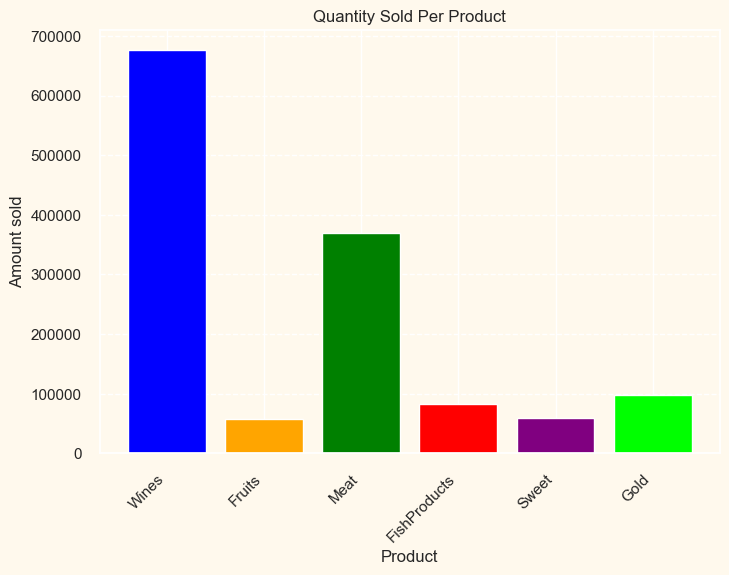

In [152]:
sizes_Product_count = Product_Count.values()
labels_Product_count = Product_Count.keys()
plt.grid(axis="y",linestyle="--")
plt.bar(labels_Product_count,sizes_Product_count,color = MyColors)
plt.xlabel("Product")
plt.ylabel("Amount sold")
plt.title("Quantity Sold Per Product")
plt.xticks(rotation=45,ha="right")
plt.show()

In [153]:
df["Age"] = 2024-df["Year_Birth"]
df["Spent"] = df["Fruits"]+df["Fish"]+df["Meat"]+df["Sweets"]+df["Gold"]+df["Wines"]
df["Living_Status"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
df["Children_Count"] = df["Kidhome"] + df["Teenhome"]
df["Family_Member_Count"] = df["Living_Status"].replace({"Alone":1,"Partner":2}) + df["Children_Count"]
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df["Is_Parent"] = np.where(df.Children_Count> 0, 1, 0)

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)


In [154]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Dur,Age,Spent,Children_Count,Family_Member_Count,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


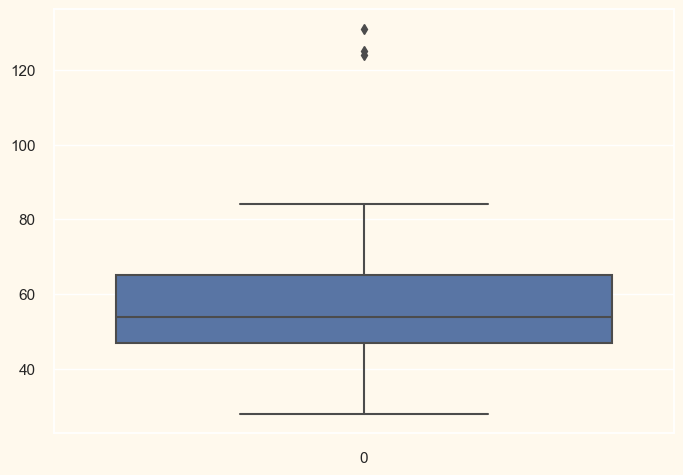

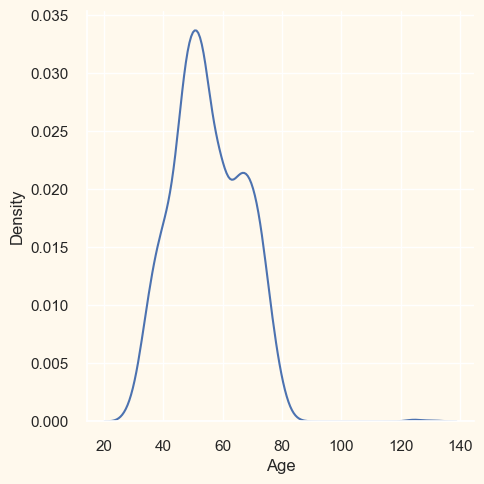

In [155]:
sns.boxplot(data= df["Age"])
sns.displot(data=df["Age"],kind="kde")

Outlier in Income for salary above 600000

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


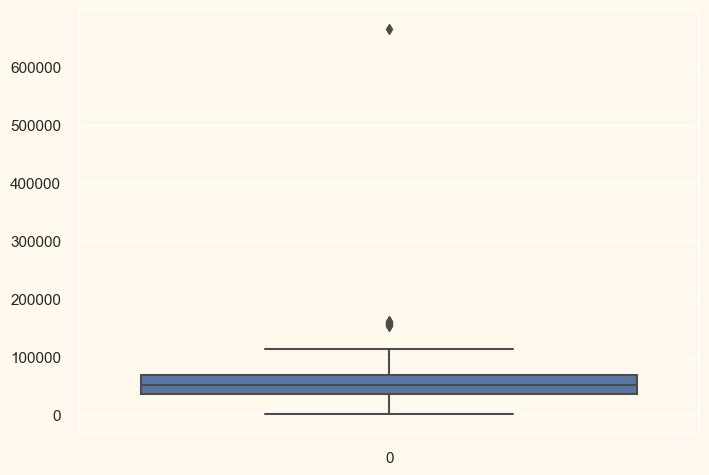

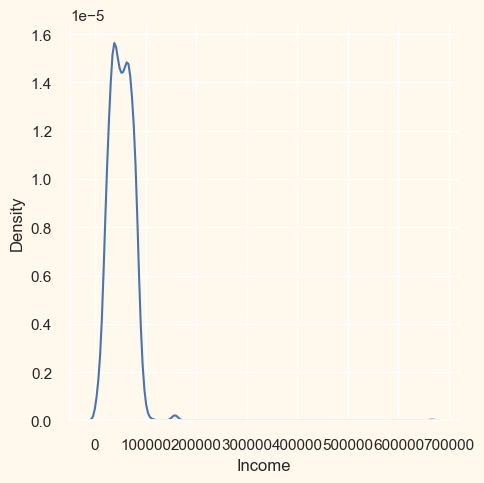

In [156]:
sns.boxplot(data=df["Income"])
sns.displot(data=df["Income"],kind="kde")

Relative Plot Of Some Selected Features: A Data Subset


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x550 with 0 Axes>

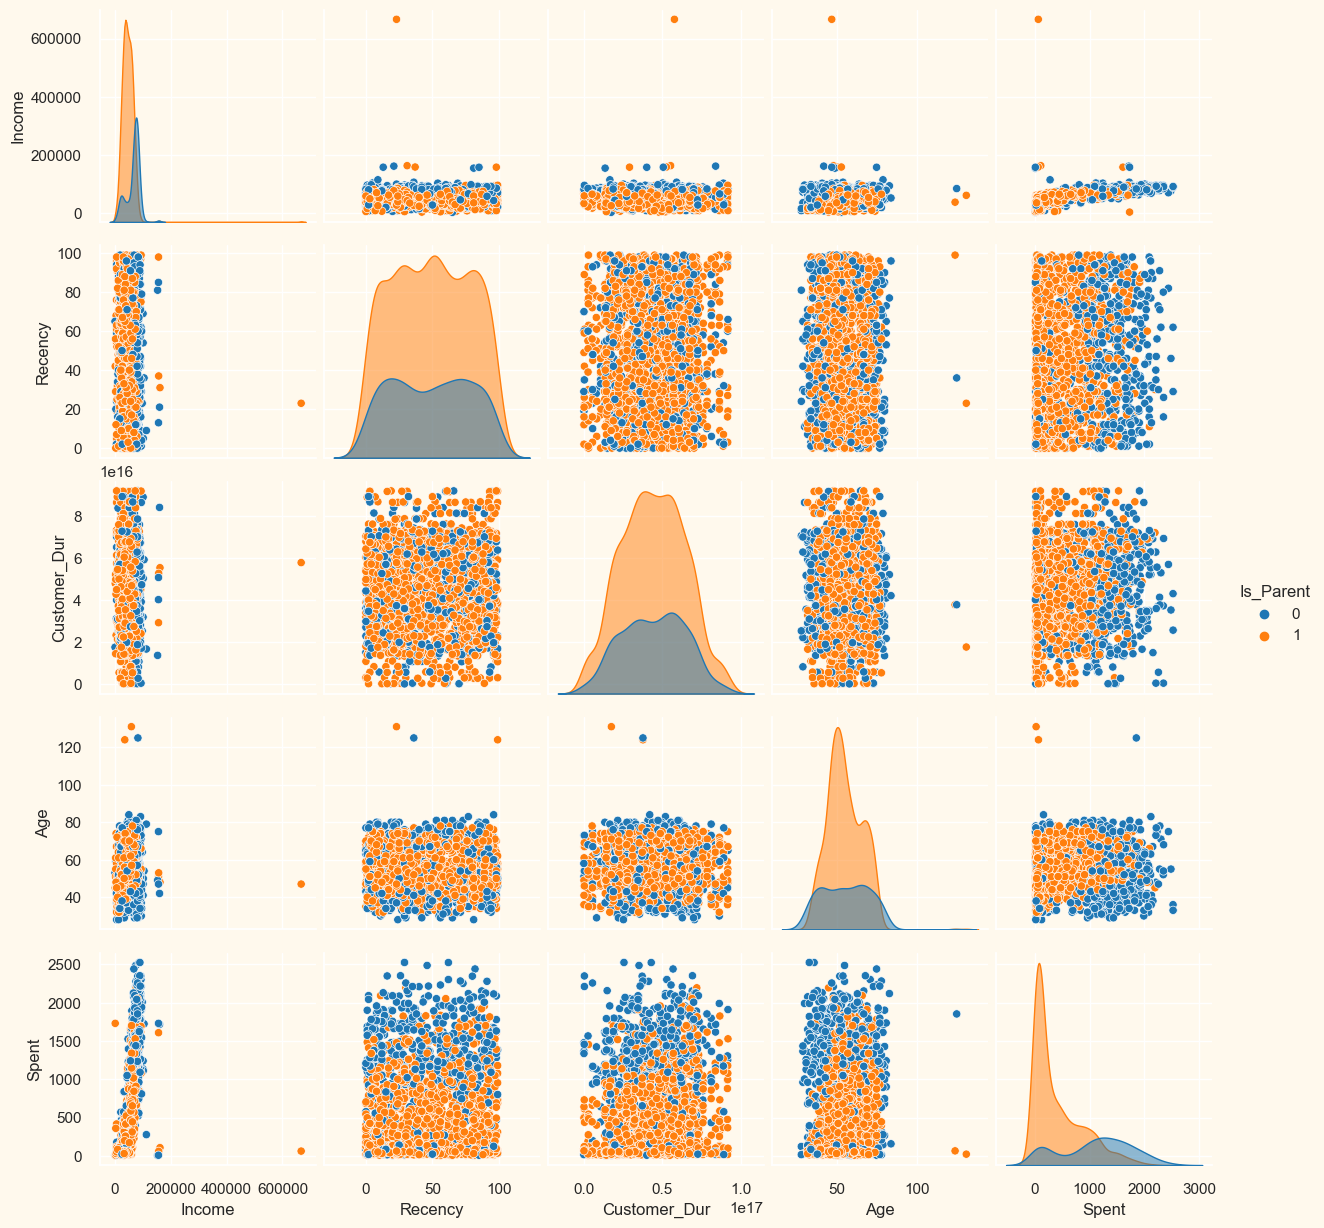

In [157]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
sns.set_palette("deep")
# Plotting following features
To_Plot = [ "Income", "Recency", "Customer_Dur", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue="Is_Parent", diag_kind='kde', diag_kws={'alpha': 0.5},palette= (["#1f77b4","#ff7f0e"]))
plt.show()

In [158]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("Total Data Points",len(df))

Total Data Points 2212


Correlated Heat map of all non categorical datas

<Axes: >

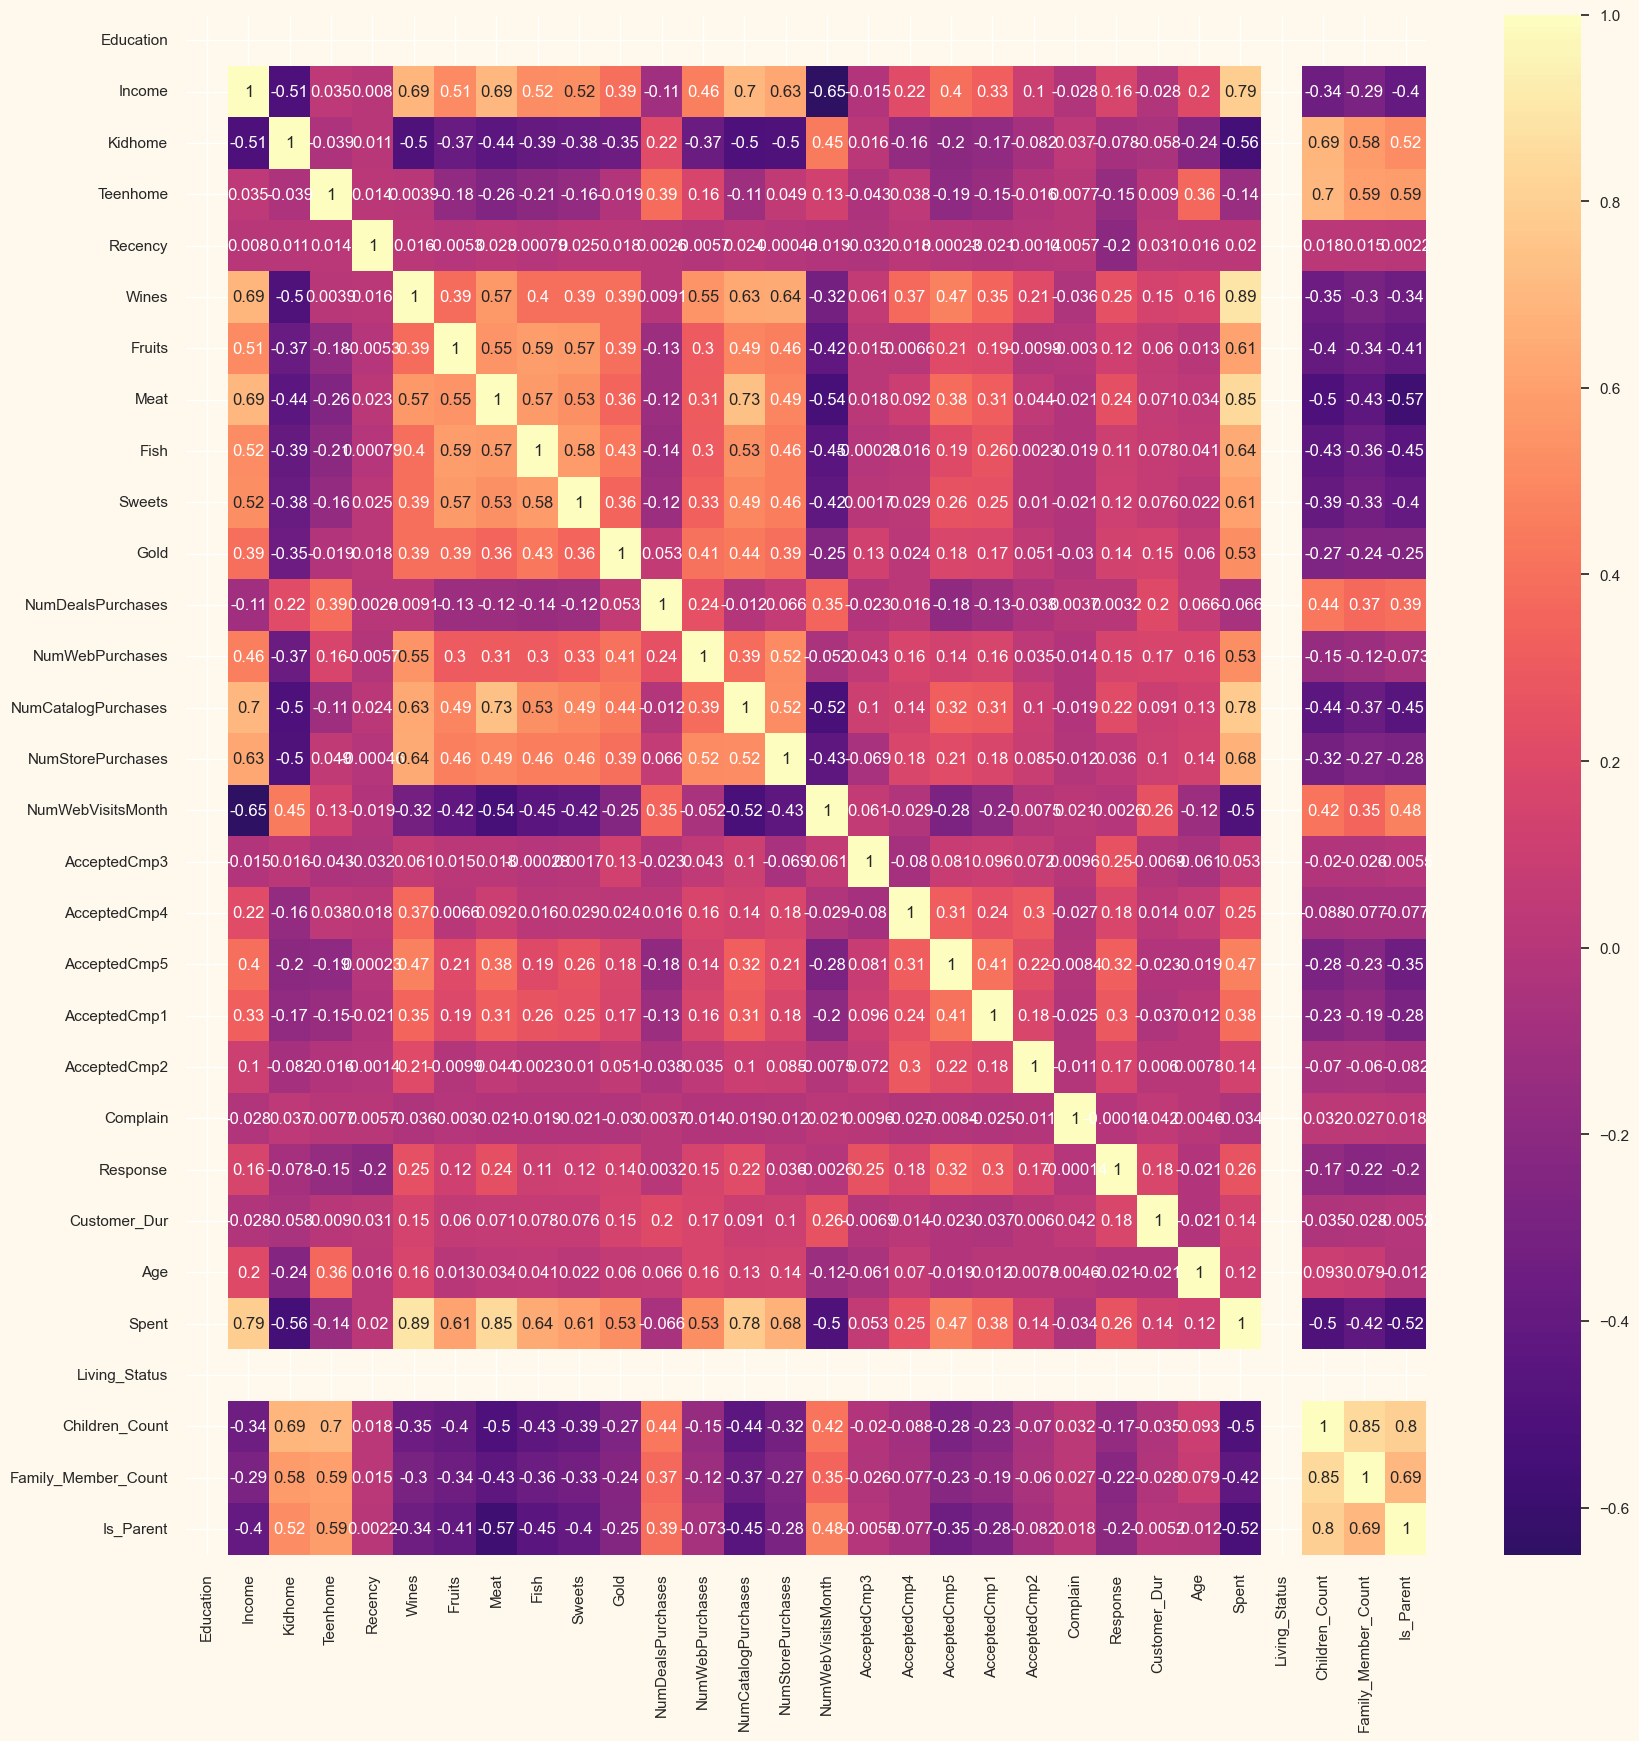

In [159]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
corrmat = df_numeric.corr()
plt.figure(figsize=(20, 20))  
sns.heatmap(corrmat, annot=True, cmap="magma", center=0)


## Data Preprocessing

In [160]:
s = (df.dtypes == "object")
obj_cols = list(s[s].index)
print("This are categorical features:",obj_cols)


This are categorical features: ['Education', 'Living_Status']


Label Encoding them

In [161]:
LE = LabelEncoder()
for i in obj_cols:
    df[i] = df[[i]].apply(LE.fit_transform)
    # print(df[[i]])

In [162]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Dur,Age,Spent,Living_Status,Children_Count,Family_Member_Count,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,67,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,70,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,59,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,40,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,43,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,57,1341,1,1,3,1
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,78,444,1,3,5,1
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,43,1241,0,0,1,0
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,68,843,1,1,3,1


In [163]:
ds = df.copy()

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)


In [164]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Dur,Age,Spent,Living_Status,Children_Count,Family_Member_Count,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [165]:
# pca = PCA(n_components=6)
pca = PCA(n_components=3)
# pca = PCA(0.95)
# PCA_df = pd.DataFrame(pca.fit_transform(scaled_ds),columns=["p1","p2","p3","p4","p5","p6"])
# print(pca_x.shape)
PCA_df = pd.DataFrame(pca.fit_transform(scaled_ds),columns=["p1","p2","p3"])
pca.explained_variance_ratio_*100


array([36.00568404, 12.66079064,  6.4890866 ])

In [166]:
PCA_df

,p1,p2,p3
0,4.994351,-0.152345,2.647468
1,-2.884455,-0.006714,-1.861868
2,2.617858,-0.720462,-0.255965
3,-2.676033,-1.542059,-0.920561
4,-0.649586,0.209248,-0.023077
...,...,...,...
2207,2.321325,2.437926,0.523425
2208,-3.105959,4.021002,-1.497241
2209,2.673686,-1.869877,0.601684
2210,1.494050,1.702095,-1.628922


In [167]:
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
p1,2212.0,5.781993e-17,2.878377,-5.969334,-2.538498,-0.780419,2.383286,7.444304
p2,2212.0,4.497106e-17,1.706839,-4.312590,-1.328364,-0.157379,1.242432,6.142023
p3,2212.0,9.315434e-17,1.221951,-3.530117,-0.827962,-0.025446,0.799416,6.639978


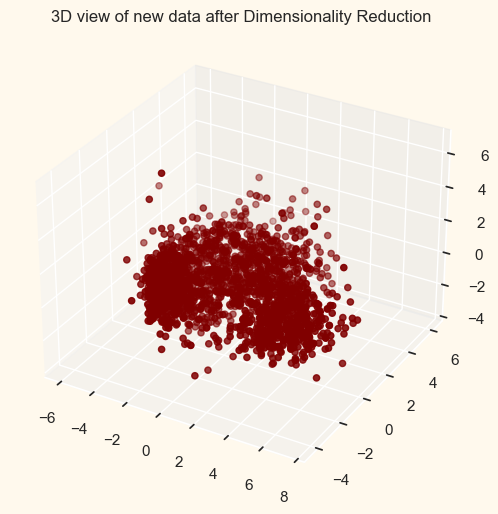

In [168]:
x = PCA_df["p1"]
y = PCA_df["p2"]
z = PCA_df["p3"]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c="maroon")
ax.set_title("3D view of new data after Dimensionality Reduction")
plt.show()


## Clustering

Elbow Method to determine the number of clusters to be formed:


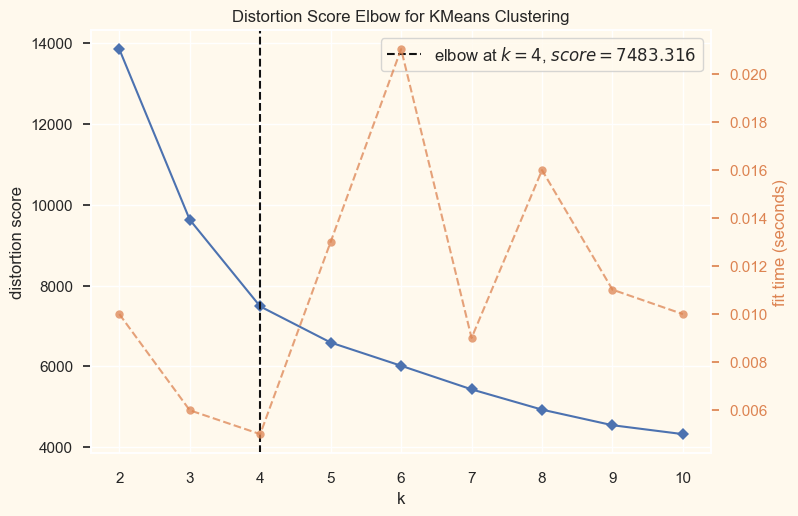

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [169]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [170]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
# df["Clusters"]= yhat_AC

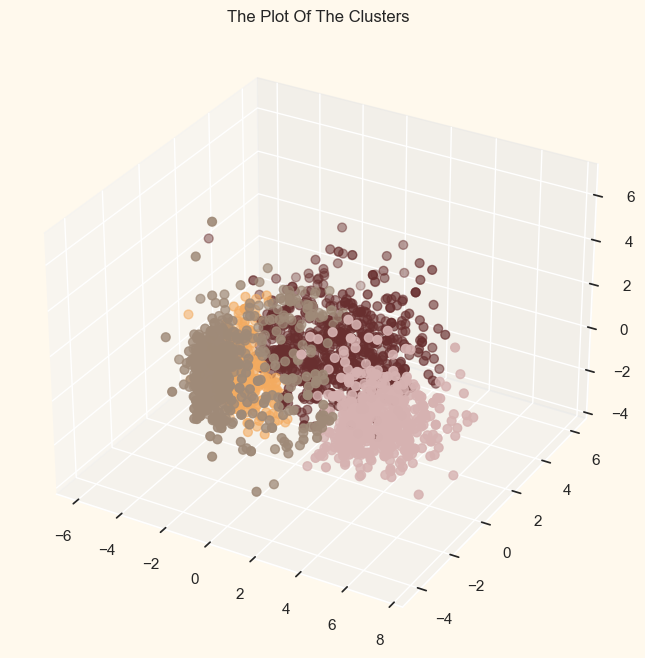

In [171]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [173]:
yhat_AC

array([1, 3, 1, ..., 2, 0, 0], dtype=int64)

In [ ]:
df.to_csv("Clustered_Marketing_Campaign.csv")

<Figure size 800x550 with 0 Axes>

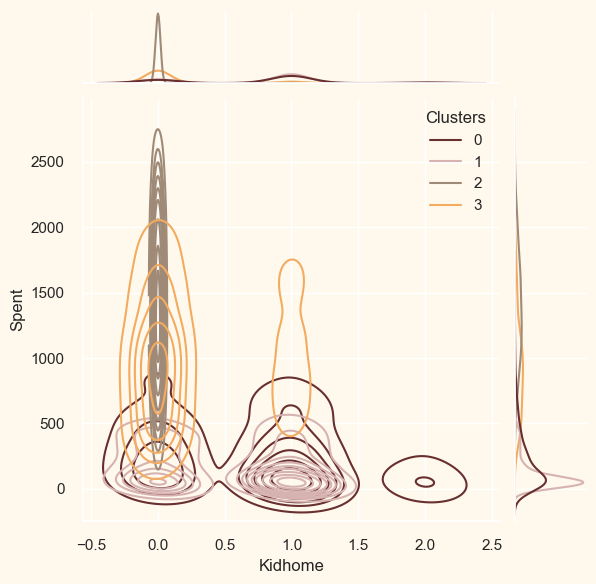

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

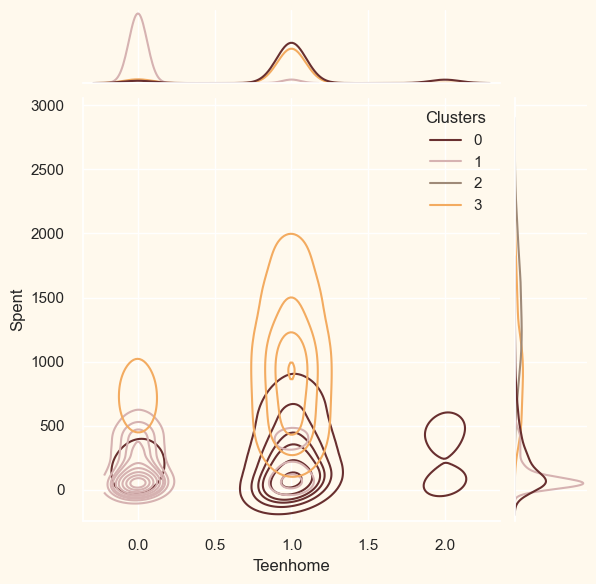

KeyError: 'Customer_For'

<Figure size 800x550 with 0 Axes>

In [74]:
import seaborn as sns
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=cmap)
    plt.show()